In [1]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
# Asegúrate de reemplazar 'tu_dataset.csv' con la ruta a tu archivo
data = pd.read_csv('perfcounters_normal_running.csv', header=None)
data = data.drop(columns=[data.columns[0]])  #Eliminamos time stamp

In [2]:

# Paso 1: Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Paso 2: Aplicar PCA para reducir la dimensionalidad al 90% de varianza acumulada
pca = PCA(n_components=100)  # Mantener el 90% de la varianza
data_pca = pca.fit_transform(data_scaled)

print(f"Dimensiones originales: {data.shape}")
print(f"Dimensiones después de PCA: {data_pca.shape}")

Dimensiones originales: (29100, 18407)
Dimensiones después de PCA: (29100, 100)


In [7]:

# Paso 3: Entrenar LOF
# Configuración de hiperparámetros:
# - n_neighbors: Número de vecinos considerados para calcular la densidad local.
# - contamination: Proporción estimada de anomalías en los datos.
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.0001, novelty=False)

In [8]:

# Ajustar el modelo y detectar anomalías
predictions = lof.fit_predict(data_pca)  # +1 para normales, -1 para anomalías
anomaly_scores = -lof.negative_outlier_factor_  # Puntuaciones de anomalía (mayor valor = más anómalo)

# Identificar anomalías
anomalies = data[predictions == -1]
normal_data = data[predictions == 1]

print(f"Número total de muestras: {data.shape[0]}")
print(f"Número de anomalías detectadas: {anomalies.shape[0]}")
print(f"Número de datos normales: {normal_data.shape[0]}")

Número total de muestras: 29100
Número de anomalías detectadas: 3
Número de datos normales: 29097


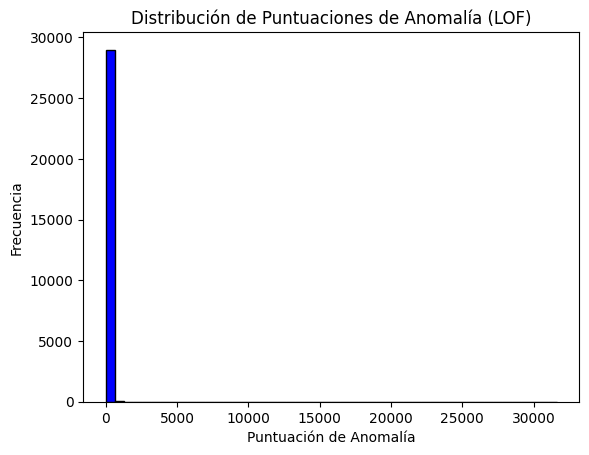

In [9]:

# Opcional: Visualizar las puntuaciones de anomalía
import matplotlib.pyplot as plt

plt.hist(anomaly_scores, bins=50, color='blue', edgecolor='black')
plt.title('Distribución de Puntuaciones de Anomalía (LOF)')
plt.xlabel('Puntuación de Anomalía')
plt.ylabel('Frecuencia')
plt.show()

In [10]:


new_data = pd.read_csv('perfcounters_anomalies_running.csv', header=None)
new_data = new_data.drop(columns=[new_data.columns[0]])

# Paso 1: Preprocesar nuevos datos
new_data_scaled = scaler.transform(new_data)
new_data_pca = pca.transform(new_data_scaled)

# Paso 2: Habilitar la detección de novedades en LOF
lof_novelty = LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=True)
lof_novelty.fit(data_pca)  # Ajustar el modelo con los datos de entrenamiento

# Paso 3: Predecir anomalías en nuevos datos
new_predictions = lof_novelty.predict(new_data_pca)  # +1 para normales, -1 para anomalías
new_anomaly_scores = -lof_novelty.decision_function(new_data_pca)  # Puntuaciones de anomalía

# Identificar anomalías en nuevos datos
new_anomalies = new_data[new_predictions == -1]
new_normals = new_data[new_predictions == 1]

print(f"Número total de nuevas muestras: {new_data.shape[0]}")
print(f"Número de nuevas anomalías detectadas: {new_anomalies.shape[0]}")
print(f"Número de nuevos datos normales: {new_normals.shape[0]}")

Número total de nuevas muestras: 1953
Número de nuevas anomalías detectadas: 626
Número de nuevos datos normales: 1327


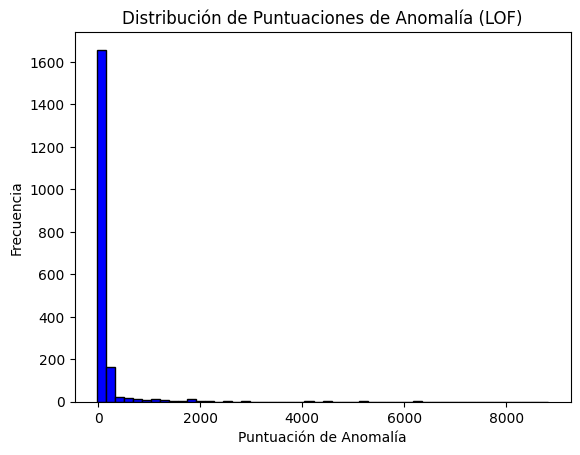

In [11]:
plt.hist(new_anomaly_scores, bins=50, color='blue', edgecolor='black')
plt.title('Distribución de Puntuaciones de Anomalía (LOF)')
plt.xlabel('Puntuación de Anomalía')
plt.ylabel('Frecuencia')
plt.show()